In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
rcParams['agg.path.chunksize'] = 10000
data = pd.read_csv('/Users/siddarthapaturu/Downloads/data.csv')

In [2]:
data.columns =['MeterNo','AccountName','AccountType','BillCycle','BillCycleID','Date','DateStr',
               'Event','ExceptionType','ExceptionTypeDesc',
               'MeterType','MeterReadType','MeterReadTypeDesc','ServicePt',
               'UOM','UOMName','TimeStamp','CurrBillCycle','PremiseName',
               'Latitude','Longitude','DateId','Value1','Value2','Record_count']

In [3]:
data.head(3)

,MeterNo,AccountName,AccountType,BillCycle,BillCycleID,Date,DateStr,Event,ExceptionType,ExceptionTypeDesc,...,UOMName,TimeStamp,CurrBillCycle,PremiseName,Latitude,Longitude,DateId,Value1,Value2,Record_count
0,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-04-15,20170415,NONE,NONE,NONE,...,kilowatts,22:45:00,0,33rd Street,36.044636,-120.321359,105,0.3358,NaN,1
1,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-02-01,20170201,NONE,NONE,NONE,...,kilowatts,22:15:00,0,33rd Street,36.044636,-120.321359,32,0.9234,NaN,1
2,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-01-21,20170121,NONE,NONE,NONE,...,kilowatts,22:45:00,0,33rd Street,36.044636,-120.321359,21,0.5033,NaN,1


In [4]:
df = data[['MeterNo','AccountType','BillCycleID','Date',
               'Event','ExceptionTypeDesc',
               'MeterReadTypeDesc',
               'TimeStamp','CurrBillCycle',
               'Latitude','Longitude','Value1']]

In [5]:
df.head(3)

,MeterNo,AccountType,BillCycleID,Date,Event,ExceptionTypeDesc,MeterReadTypeDesc,TimeStamp,CurrBillCycle,Latitude,Longitude,Value1
0,1679,RESIDENTIAL,BC10,2017-04-15,NONE,NONE,ACTUAL,22:45:00,0,36.044636,-120.321359,0.3358
1,1679,RESIDENTIAL,BC10,2017-02-01,NONE,NONE,ACTUAL,22:15:00,0,36.044636,-120.321359,0.9234
2,1679,RESIDENTIAL,BC10,2017-01-21,NONE,NONE,ACTUAL,22:45:00,0,36.044636,-120.321359,0.5033


In [8]:
df['DateTime'] = df.apply(lambda r: r['Date'] + ' ' + r['TimeStamp'], axis = 1)
df['DateTime'] = pd.to_datetime(df['DateTime'])

/Users/siddarthapaturu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/siddarthapaturu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
cleaned_df = df[['DateTime','Value1']]
cleaned_df.head(3)

,DateTime,Value1
0,2017-04-15 22:45:00,0.3358
1,2017-02-01 22:15:00,0.9234
2,2017-01-21 22:45:00,0.5033


In [30]:
cleaned_df["WeekDay"] = cleaned_df['DateTime'].dt.weekday_name
cleaned_df["hour"] = cleaned_df["DateTime"].dt.hour
cleaned_df.head(3)

/Users/siddarthapaturu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/siddarthapaturu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,DateTime,Value1,WeekDay,hour
0,2017-04-15 22:45:00,0.3358,Saturday,22
1,2017-02-01 22:15:00,0.9234,Wednesday,22
2,2017-01-21 22:45:00,0.5033,Saturday,22


In [43]:
grouped_df = cleaned_df.pivot_table(index = "hour", values = "Value1", aggfunc = np.mean).reset_index()

grouped_week = cleaned_df.pivot_table(index = ["WeekDay","hour"], values = "Value1", aggfunc = np.mean).reset_index()

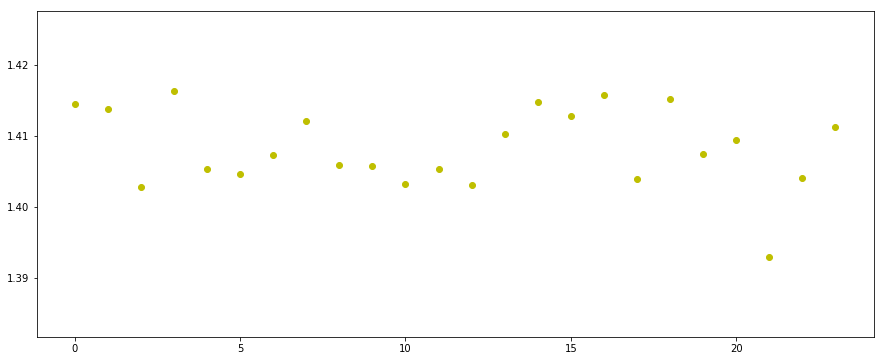

In [50]:
plt.scatter(grouped_df['hour'],grouped_df['Value1'],c='y')
plt.show()

In [57]:
num_clusters = 5
random_initial_points = np.random.choice(grouped_df.index, size=num_clusters)
centroids = grouped_df.loc[random_initial_points]

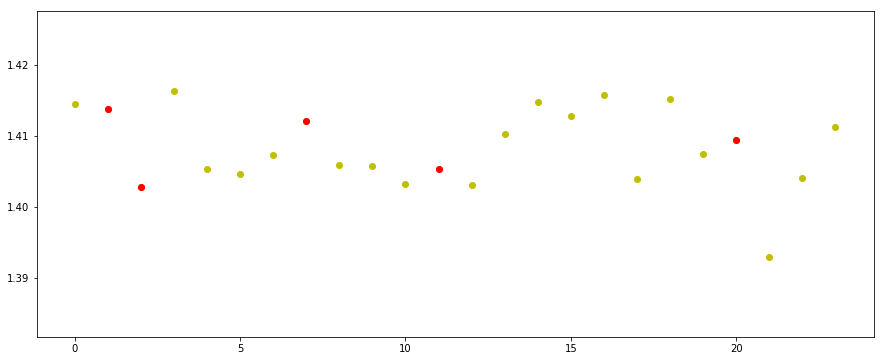

In [58]:
plt.scatter(grouped_df['hour'],grouped_df['Value1'],c='y')
plt.scatter(centroids['hour'],centroids['Value1'],c='red')
plt.show()

In [61]:
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['hour'], clustered_df['Value1'], c=colors[n-1])
        plt.xlabel('Hour', fontsize=13)
        plt.ylabel('Consumption', fontsize=13)
    plt.show()

/Users/siddarthapaturu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


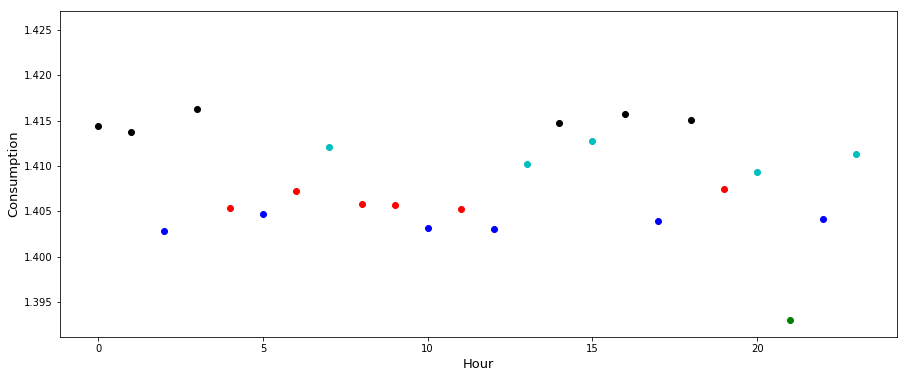

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(grouped_df['Value1'].reshape(-1,1))
grouped_df['cluster'] = kmeans.labels_

visualize_clusters(grouped_df, num_clusters)

In [6]:
geo_exceptions = df[df['ExceptionTypeDesc'] != 'NONE']

/Users/siddarthapaturu/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/siddarthapaturu/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


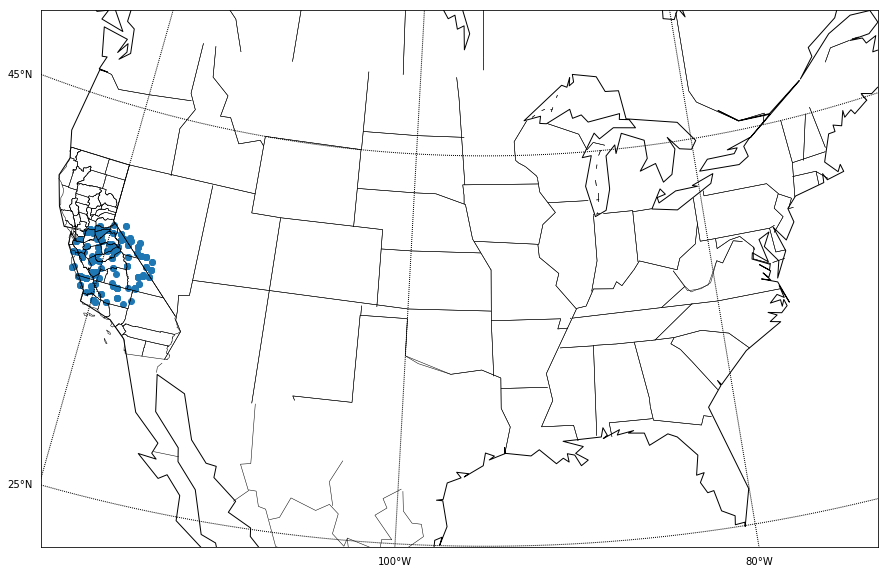

In [7]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])
m.readshapefile('CA_counties', name='counties', drawbounds=True)
longitudes = geo_exceptions["Longitude"].tolist()
latitudes = geo_exceptions["Latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x,y,marker="o")
m.drawcoastlines()
m.drawstates()
plt.show()